<h1> Análise dos dados do Censo Agropecuário - IBGE </h1>

<h3> O que é o Censo Agropecuário?</h3>

<h7> O Censo Agropecuário, realizado pelo Instituto Brasileiro de Geografia e Estatística (IBGE), é a principal e mais completa investigação estatística e territorial sobre a produção agropecuária do país. Visa obter informações sobre a estrutura, a dinâmica e o nível de produção da atividade agropecuária brasileira.

As informações geradas possibilitam a avaliação de políticas públicas como, por exemplo, a de redistribuição de terras. Elas permitem, ainda, estudos a respeito da expansão das fronteiras agrícolas, da dinamização produtiva ditada pelas inovações tecnológicas, e enriquecem a produção de indicadores ambientais. Propiciam também análises sobre transformações decorrentes do processo de reestruturação e de ajustes na economia e de seus reflexos sobre o setor.

Enquanto as pesquisas mensais e trimestrais sobre agricultura e pecuária disponibilizam dados referentes ao Brasil, Grandes Regiões e Unidades da Federação, os resultados do Censo Agro são referidos a municípios e a localidades, permitindo agregações e análises de diferentes recortes territoriais, como unidades de conservação ambiental, terras indígenas, bacias hidrográficas, Biomas, assentamentos fundiários, áreas remanescentes de quilombos, etc.

O Brasil realizou o seu primeiro Censo Agropecuário em 1920. Em 1936, foi fundado o IBGE, que passou a ser o responsável pela realização dos Censos do país. De 1940 a 1970, os Censos Agropecuários foram realizados a cada dez anos e a partir de então passaram a ocorrer a cada cinco anos, ou seja, em 1975, 1980 e 1985.

Em 1990 não foi possível a sua execução, sendo realizado somente em 1996, e o último Censo Agropecuário foi realizado em 2007. Este 11º Censo Agropecuário será o resultado de um processo contínuo de aperfeiçoamento, para conferir com maior nitidez a realidade do campo deste nosso imenso território brasileiro.   

Fonte: IBGE </h7>

<h3> Quais perguntas norteiam esse análise? </h3>

<h7> Por se tratar de um dataset extretamente amplo, com mais de 116 colunas, faz-se necsesário selecionar apenas as variáveis que nos interessam para definir o objeto de análise. Sendo assim, escolhemos analisar a <b>produção de algodão</b> nos estados brasileiros. 

As perguntas que guiam este trabalho são as seguintes:

1) Quais os <b> três estados que mais produzem algodão </b> segundo a edição  mais recente do Censo Agropecuário (2017)?

2) Qual a <b> evolução da produção </b> de algodão nesses estados durante as últimas quatro edições do Censo?
    

</h7>


In [344]:
# Instalando o pacote Base dos Dados
!pip install basedosdados

# Importando os pacotes
import pandas as pd
import basedosdados as bd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [290]:
# Para carregar o dado direto no pandas

df = bd.read_table(dataset_id='br_ibge_censo_agropecuario',
table_id='municipio',
billing_project_id="761493106314")

Downloading: 100%|████████████████████████████████████████████████████████████| 20738/20738 [00:27<00:00, 752.12rows/s]


In [332]:
# Precisamos transformar a variável 'ano' em categórica, ao invés de 'inteira' para poder agrupar os estados

df['ano_cat'] = df['ano'].astype("category")
df.dtypes

ano                                  Int64
sigla_uf                            object
id_municipio                        object
area_total                         float64
area_proprietario                  float64
                                    ...   
proporcao_despesa_fertilizante     float64
proporcao_despesa_defensivos       float64
proporcao_despesa_sementes         float64
proporcao_despesa_salarios         float64
ano_cat                           category
Length: 117, dtype: object

In [346]:
# Agora criamos um novo dataset com apenas as variáveis de interesse da nossa análise. 
# Quais sejam: estado, ano e produção total de algodão. Em seguida listamos as primeiras 10 linhas.

df_2 = df[['sigla_uf', 'ano_cat', 'producao_total_algodao']]
df_2.head(10)

,sigla_uf,ano_cat,producao_total_algodao
0,RO,1985,146.650
1,RO,1985,135.820
2,RO,1985,0.000
3,RO,1985,104.340
4,RO,1985,414.645
5,RO,1985,13.940
6,RO,1985,123.980
7,RO,1985,158.733
8,RO,1985,400.355
9,RO,1985,826.840


In [347]:
# Vamos contar agora quantos valores nulos temos no nosso dataset
df_2.isna().sum()

sigla_uf                    0
ano_cat                     0
producao_total_algodao    320
dtype: int64

In [349]:
# Para tratar os 320 registros nulos na coluna 'producao_total_algodao' vamos substituí-los por zeros
# Em seguida conferimos se a soma dos nulos é igual a ZERO

df_2['producao_total_algodao'] = df_2['producao_total_algodao'].fillna(0)
df_2.isna().sum()

sigla_uf                  0
ano_cat                   0
producao_total_algodao    0
dtype: int64

In [351]:
# Agora começamos a responder nossas perguntas.
# Criando um dataset agrupando os Estados e fitrando pelo ano de 2017 
 
df_maior_2017 = df_2[(df_2.ano_cat==2017)].groupby(["sigla_uf"], as_index=False).sum()
df_maior_2017_sorted = df_maior_2017.sort_values('producao_total_algodao', ascending=False)
df_maior_2017_sorted

,sigla_uf,producao_total_algodao
9,MA,82742.0
16,PI,38757.0
13,PA,12824.0
22,RS,9509.0
5,CE,6861.0
23,SC,5925.0
26,TO,5512.0
17,PR,4578.0
0,AC,3248.0
14,PB,2823.0


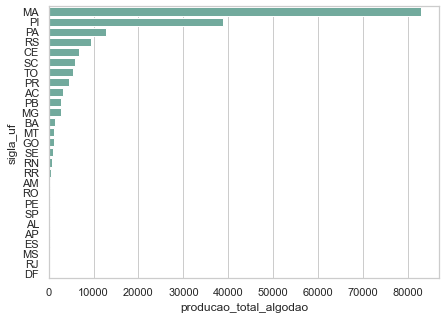

In [374]:
# Para a visualização da primeira pergunta escolhemos o gráfico de barras.

# Escolhendo o estilo do gráfico
sns.set(style="whitegrid")

# Escolhendo o tamanho
plt.figure(figsize=(7, 5))

# E finalmente plotando
sns.barplot(
    x="producao_total_algodao",
    y='sigla_uf',
    data=df_maior_2017_sorted, 
    ci=None, 
    color='#69b3a2',
    );

<h6> O gráfico acima nos mostra os três estados líderes em produção de algodão segundo o Censo Agropecuário 2017:
    Maranhão, Piauí e Pará. </h6> 

In [371]:
#Criando o dataset para selecionar a evolução da produção de algodão no Maranhão

df_evolucao = df_2[(df_2.sigla_uf=='MA')].groupby(["ano_cat"], as_index=False).sum()
df_evolucao


,ano_cat,producao_total_algodao
0,1985,608375.914
1,1996,2316.000
2,2006,523471.000
3,2017,82742.000


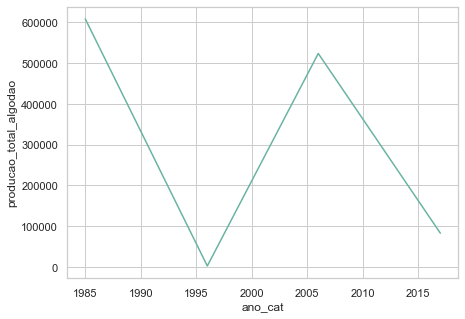

In [373]:
# Vamos para o segundo gráfico:
# Escolhendo o estilo do gráfico

sns.set(style="whitegrid")

# Escolhendo o tamanho
plt.figure(figsize=(7, 5))

# E finalmente plotando
sns.lineplot(
    x="ano_cat",
    y='producao_total_algodao',
    data=df_evolucao, 
    ci=None, 
    color='#69b3a2',
    );

<h6> É possível notar a instabilidade da produção maranhense de algodão. No Censo de 1985 o estado produzia acima de 600 mil toneladas.
    
Número esse que despencou para cerca de 2.300 no Censo seguinte. Já no ano de 2006 há uma recuperação para um nível de produção ligeiramente inferior ao de 1985, algo acima de 230 mil toneladas.
    
No último Censo, porém, o número ficou en 82 mil toneladas. </h6>
